# **Importing Libraries and Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

# Data exploration

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


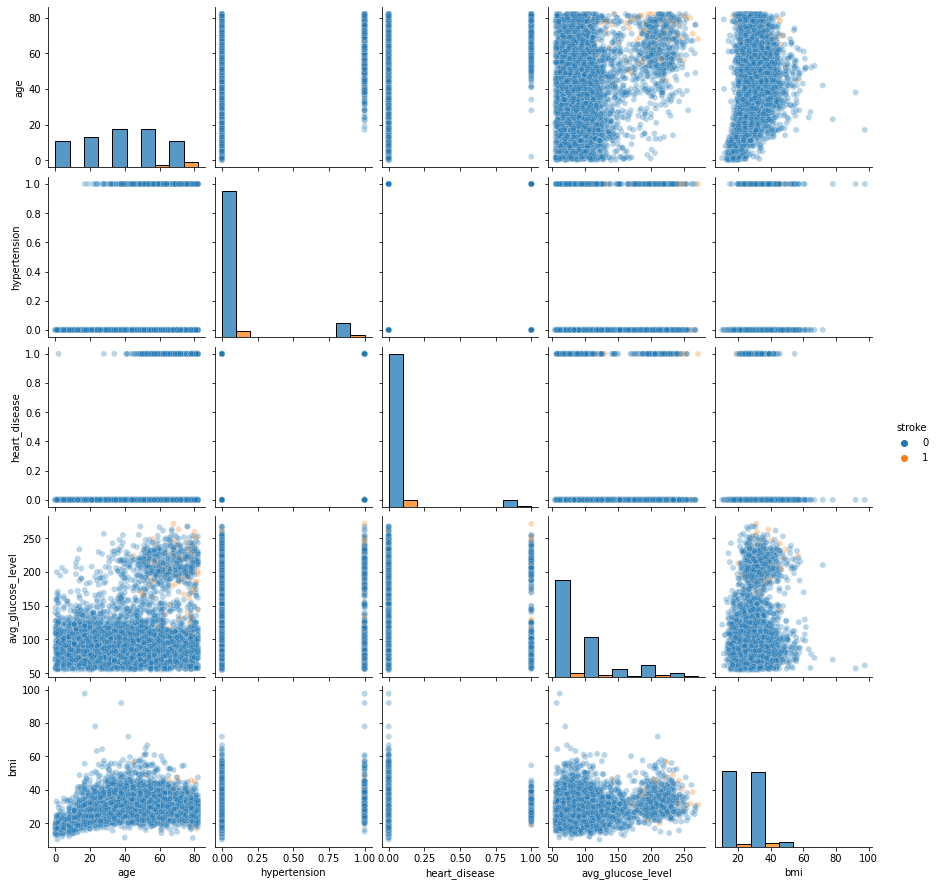

In [7]:
#Pair Plot
sns.pairplot(df.drop('id',axis=1),hue="stroke",plot_kws={'alpha':0.3},diag_kind='hist',diag_kws={'multiple':'dodge','bins':5})

<AxesSubplot:xlabel='stroke', ylabel='Count'>

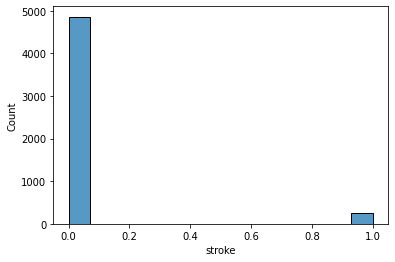

In [8]:
#Label hisogram 
sns.histplot(df['stroke'])

In [9]:
#Skewed Data !!!

### Age

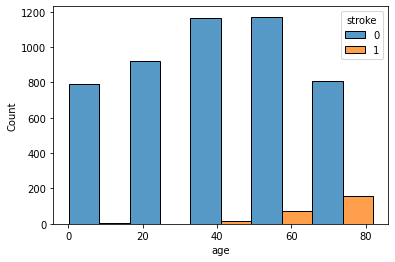

In [10]:
#Histogram
g = sns.histplot(x= 'age',hue='stroke',data=df,bins=5,multiple='dodge')

In [11]:
#It is obvious that older people are more exposed to the risk of stroke, let's split age column and compute the proportion of positive labels per segment

In [12]:
#Splitting function
def age_split(col):
    age = col
    if age<=18 :
        return '1'
    elif 18<age<=30 :
        return '2'
    elif 30<age<=40 :
        return '3'    
    elif 40<age<=50 :
        return '4'
    elif 50<age<=60 :
        return '5'
    elif 60<age<=85:
        return '6'

In [13]:
df['Age_Category'] = df['age'].apply(age_split)
age_2 = pd.DataFrame(df.groupby('Age_Category')['stroke'].value_counts())
age_2['proportion'] = round(age_2['stroke']/df.groupby('Age_Category')['id'].count(),4)
age_2

stroke  proportion
Age_Category stroke                    
1            0          914      0.9978
             1            2      0.0022
2            0          654      1.0000
3            0          668      0.9911
             1            6      0.0089
4            0          724      0.9797
             1           15      0.0203
5            0          774      0.9405
             1           49      0.0595
6            0         1127      0.8643
             1          177      0.1357

Text(0.5, 1.0, 'Proportion of strokes per age category')

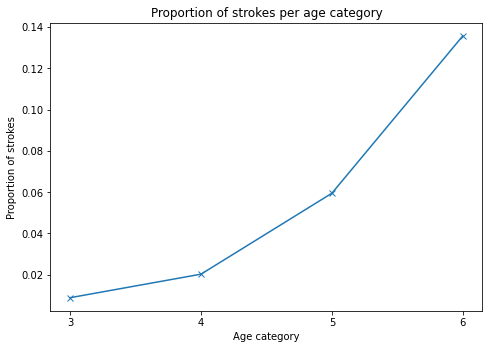

In [14]:
#Plot proportions
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(['3','4','5','6'],age_2[(age_2.index.get_level_values(1)==1)&(age_2.index.get_level_values(0)!='1')]['proportion'],
        marker='x')
plt.xlabel('Age category')
plt.ylabel('Proportion of strokes')
plt.title('Proportion of strokes per age category')

In [15]:
#According to the Data, out of 100 person older than 60 years, approximately 14 had a stroke

### Smoking status

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

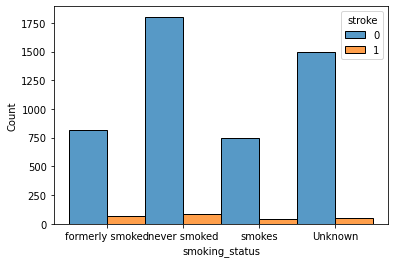

In [16]:
#Barplot
sns.histplot(x='smoking_status',data=df,hue='stroke',multiple='dodge')

In [17]:
#No conclusions can be drawn from the previous plot, lets use the same approach as for Age. 


In [18]:
##Computing the proportion of positive labels per smoking status
smoke_ =  pd.DataFrame(df.groupby('smoking_status')['stroke'].value_counts())
smoke_['proportion'] = smoke_['stroke']/df.groupby('smoking_status')['id'].count()
smoke_

stroke  proportion
smoking_status  stroke                    
Unknown         0         1497    0.969560
                1           47    0.030440
formerly smoked 0          815    0.920904
                1           70    0.079096
never smoked    0         1802    0.952431
                1           90    0.047569
smokes          0          747    0.946768
                1           42    0.053232

<AxesSubplot:xlabel='smoking_status', ylabel='proportion'>

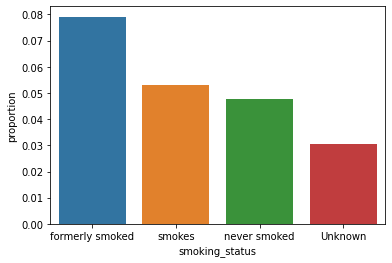

In [19]:
#Redoing Barplot using proportions
sns.barplot(smoke_.index.get_level_values(0).unique(),
            smoke_[smoke_.index.get_level_values(1)==1]['proportion'],order=['formerly smoked','smokes','never smoked','Unknown'])

In [20]:
#From that plot we can say that smoking status might be related to stroke proportion . 
#Still, one might think that old people had more time to smoke, enjoy smoking then quit smoking HAHA. Let's look at the relation between Age and Smoking Status

### Age & Smoking_Status

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

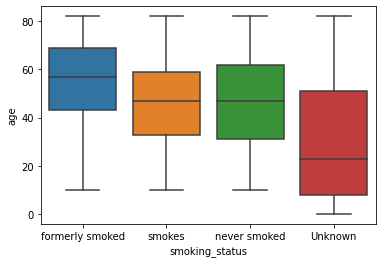

In [21]:
#Box Plot
sns.boxplot(x='smoking_status',y='age',data=df,order=['formerly smoked','smokes','never smoked','Unknown'])

In [22]:
#As expected, Formerly_smoked category has a higher age average... Let's look deeper using proportions by Age_Category & Smoking_status

In [23]:
age_smoke = pd.DataFrame(df.groupby(['Age_Category','smoking_status'])['stroke'].value_counts())
age_smoke['proportion'] = np.round(age_smoke['stroke']/df.groupby(['Age_Category','smoking_status'])['id'].count(),4)
age_smoke

stroke  proportion
Age_Category smoking_status  stroke                    
1            Unknown         0          707      0.9972
                             1            2      0.0028
             formerly smoked 0           28      1.0000
             never smoked    0          165      1.0000
             smokes          0           14      1.0000
2            Unknown         0          150      1.0000
             formerly smoked 0           69      1.0000
             never smoked    0          301      1.0000
             smokes          0          134      1.0000
3            Unknown         0          138      1.0000
             formerly smoked 0           95      0.9794
                             1            2      0.0206
             never smoked    0          292      0.9966
                             1            1      0.0034
             smokes          0          143      0.9795
                             1            3      0.0205
4            Unknown         0          149      0.9868
                             1            2      0.0132
             formerly smoked 0          124      0.9764
                             1            3      0.0236
             never smoked    0          295      0.9768
                             1            7      0.0232
             smokes          0          156      0.9811
                             1            3      0.0189
5            Unknown         0          141      0.9216
                             1           12      0.0784
             formerly smoked 0          177      0.9415
                             1           11      0.0585
             never smoked    0          309      0.9626
                             1           12      0.0374
             smokes          0          147      0.9130
                             1           14      0.0870
6            Unknown         0          212      0.8724
                             1           31      0.1276
             formerly smoked 0          322      0.8564
                             1           54      0.1436
             never smoked    0          440      0.8627
                             1           70      0.1373
             smokes          0          153      0.8743
                             1           22      0.1257

Text(0.5, 1.0, 'Proportion of strokes per age category & smoking status')

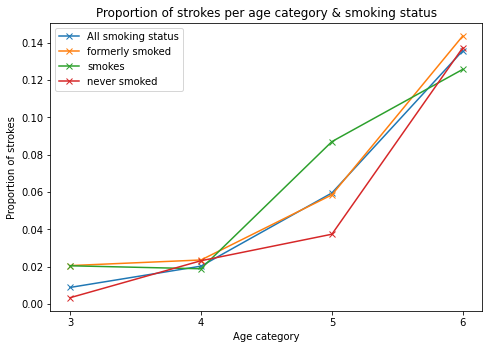

In [24]:
#Plotting proportions per Age_Category & smoking_status, the blue line represents propotions computed without using the smoking_status information 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(['3','4','5','6'],age_2[(age_2.index.get_level_values(1)==1)&(age_2.index.get_level_values(0)!='1')]['proportion'],
        label ='All smoking status',marker='x')
ax.plot(['3','4','5','6'],age_smoke[(age_smoke.index.get_level_values(1)=='formerly smoked')&(age_smoke.index.get_level_values(2)==1)]['proportion'],
        label ='formerly smoked',marker='x')
ax.plot(['3','4','5','6'],age_smoke[(age_smoke.index.get_level_values(1)=='smokes')&(age_smoke.index.get_level_values(2)==1)]['proportion'],
        label ='smokes',marker='x')
ax.plot(['3','4','5','6'],age_smoke[(age_smoke.index.get_level_values(1)=='never smoked')&(age_smoke.index.get_level_values(2)==1)]['proportion'],
        label ='never smoked',marker='x')
plt.legend()
plt.xlabel('Age category')
plt.ylabel('Proportion of strokes')
plt.title('Proportion of strokes per age category & smoking status')

In [25]:
#For Formerly_smoked status the proportion of stroke is higher for all age categories. For other smoking status, the effect tends to vary among age categories.

### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

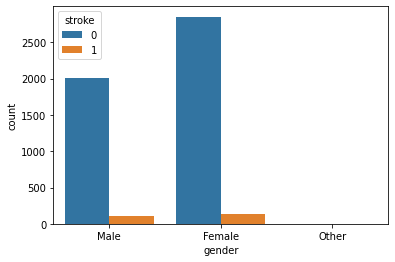

In [26]:
#Countplot
sns.countplot(x='gender',hue='stroke',data=df)

In [27]:
#Proportion of stroke per Gender
gender_ = pd.DataFrame(df.groupby(['gender','stroke'])['id'].count())
gender_['proportion'] = round(gender_['id']/df.groupby('gender')['id'].count(),4)
gender_

id  proportion
gender stroke                  
Female 0       2853      0.9529
       1        141      0.0471
Male   0       2007      0.9489
       1        108      0.0511
Other  0          1      1.0000

In [28]:
#Slight difference between Male and Female in term of stoke proportion. 
#Keep in mind we are dealing with skewed Data, proportions of stroke is approximately 4%...

<AxesSubplot:xlabel='gender', ylabel='age'>

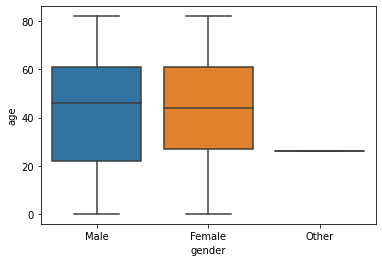

In [29]:
#Boxplot (gender vs Age)
sns.boxplot(x='gender',y='age',data=df)

In [30]:
#Slight difference between Male and Female in term of Age average

### Ever_married

<AxesSubplot:xlabel='ever_married', ylabel='count'>

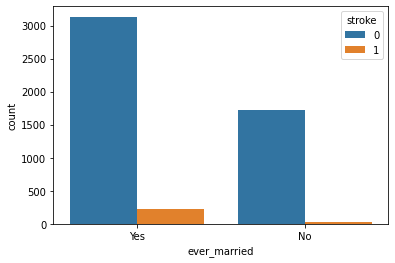

In [31]:
#Count plot
sns.countplot('ever_married',hue='stroke',data=df)

In [32]:
#Proportions of stroke per ever_married status
married_ = pd.DataFrame(df.groupby(['ever_married','stroke'])['id'].count())
married_['proportion'] = married_['id']/df.groupby('ever_married')['id'].count()
married_

id  proportion
ever_married stroke                  
No           0       1728    0.983495
             1         29    0.016505
Yes          0       3133    0.934387
             1        220    0.065613

<AxesSubplot:xlabel='ever_married', ylabel='proportion'>

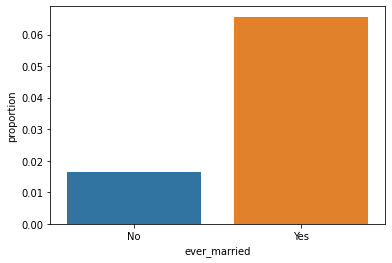

In [33]:
sns.barplot(married_.index.get_level_values(0).unique(),
            married_[married_.index.get_level_values(1)==1]['proportion'])

In [34]:
#WOW, rethinking marriage is a must LOL!! 

<AxesSubplot:xlabel='ever_married', ylabel='age'>

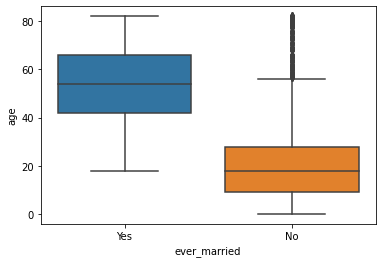

In [35]:
#Boxplot (ever_married vs age)
sns.boxplot(x='ever_married',y='age',data=df)

In [36]:
#fortunately, it's the age effect...

### Heart Disease & Hypertension

<AxesSubplot:ylabel='age'>

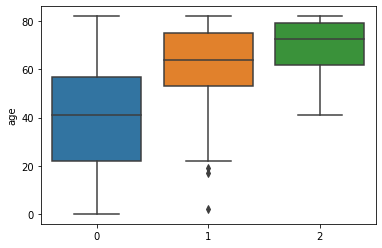

In [37]:
#box plot showing average age of people having Heart disease/hypertension, both or none 
sns.boxplot(x=df['hypertension']+df['heart_disease'],y=df['age'])

In [38]:
#Let's focus on people older than 50 (Age_Category = 5 & 6).

In [39]:
#Proportion of stroke per Age_Category,heart_disease & Hypertension
age_disease = pd.DataFrame(df.groupby(['Age_Category','heart_disease','hypertension','stroke'])['id'].count())
age_disease['proportion'] = age_disease['id']/df.groupby(['Age_Category','heart_disease','hypertension'])['id'].count()


In [40]:
age_disease['age']=age_disease.index.get_level_values(0)
age_disease['heart_disease']=age_disease.index.get_level_values(1)
age_disease['hypertension']=age_disease.index.get_level_values(2)
age_disease['stroke']=age_disease.index.get_level_values(3)

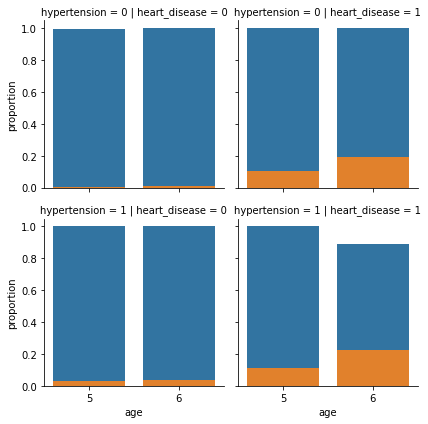

In [41]:
#Ploting propotions for people older than 50 (Age_Category =5,6)
f = sns.FacetGrid(data=age_disease,col='heart_disease',row='hypertension',hue='stroke')
f.map(sns.barplot,'age','proportion')

In [42]:
#The orange color represents the proportion of stroke. It's clear that heart disease and hypertension increase the probability of experiencing strokes

### BMI & avg_glucose_level

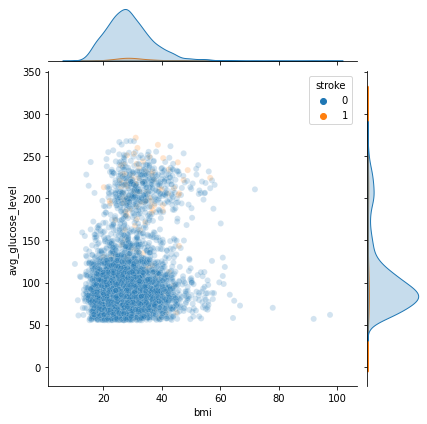

In [43]:
#JoinPlot
sns.jointplot(x='bmi',y='avg_glucose_level',data=df,hue='stroke',alpha=0.2)

### Correlation 

<AxesSubplot:>

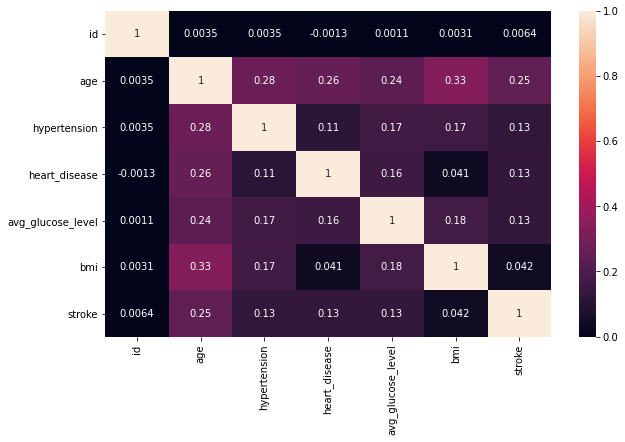

In [44]:
#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

### Missing Data

<AxesSubplot:>

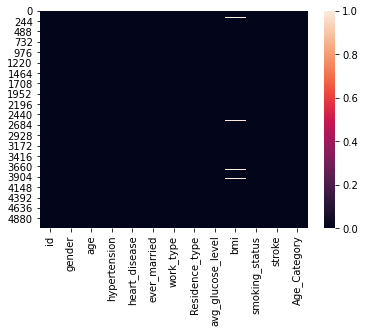

In [45]:
#heatmap
sns.heatmap(df.isnull())

In [46]:
#Some bmi values are missing

### Fill BMI Column

In [47]:
#Correlation matrix shows that bmi is correlated with age (corr = 0.33), hypertension (corr = 0.17) and average glucose level (corr = 0.18).
#We can create a linear model using these three parameters to predict missing BMI or just use mean per Age_Category.

In [48]:
#Mean BMI per Age_Category & Hypertension & Stroke
dg = df.groupby(['Age_Category','stroke','hypertension'])['bmi'].mean().reset_index()
dg.head()

,Age_Category,stroke,hypertension,bmi
0,1,0,0,21.619037
1,1,0,1,97.600000
2,1,1,0,30.900000
3,2,0,0,27.977532
4,2,0,1,41.788889


In [49]:
#Let's use this table to fill the missing values,
def fill_bmi(cols) :
    global g
    t = cols[3]
    b = cols[0]
    s = cols[1]
    a = cols[2]
    if np.isnan(b)==False :
        return b
    else : 
        return round(float(dg[(dg['stroke']==s) & (dg['Age_Category']==a) & (dg['hypertension']==t)]['bmi']),1)

In [50]:
df['filled_bmi'] = df[['bmi','stroke','Age_Category','hypertension']].apply(fill_bmi,axis=1)

### Get dummy variables for categorical data

In [51]:
dum1 = pd.get_dummies(df['gender'],drop_first=True)
dum2 = pd.get_dummies(df['ever_married'],drop_first=True)
dum3 = pd.get_dummies(df['work_type'],drop_first=True)
dum4 = pd.get_dummies(df['Residence_type'],drop_first=True)
dum5 = pd.get_dummies(df['smoking_status'],drop_first=True)

In [52]:
df = pd.concat([df,dum1,dum2,dum3,dum4,dum5],axis=1)

<AxesSubplot:>

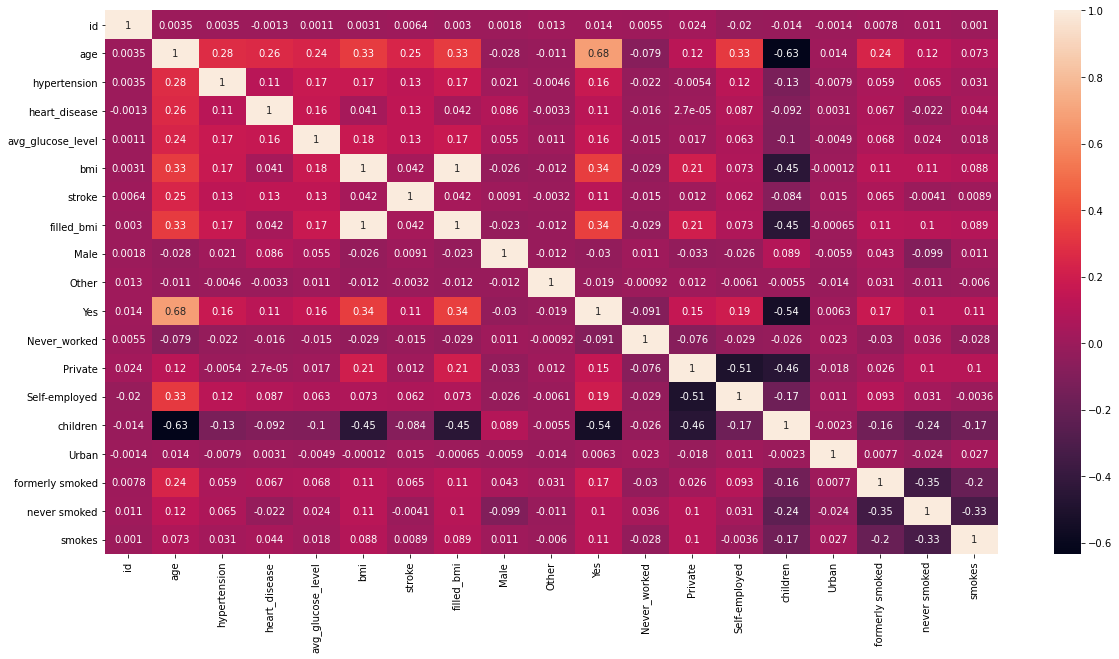

In [53]:
#New correlation matrix 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# k-nearest neighbors model

In [54]:
X = df.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status','Age_Category','stroke','bmi'],axis=1)
y = df['stroke']

In [55]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### KNN using SMOTE 

In [56]:
#SMOTE on training Set
smote = SMOTE(sampling_strategy=0.7)
X_trainS , y_trainS = smote.fit_resample(X_train,y_train)

In [57]:
#Choosing K value by cross validation 
#Result Dataframe
report = pd.DataFrame(index = ['avg accuracy','avg sensitivity','avg precision','avg specifity','avg negative-precision','f-score'])
#Kvalues
K = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for i in K :
    #Pipeline for scaling Data and fitting Knn model
    pipe = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=i))])
    arr = np.zeros(6)

    #Using 5 folds for cross validation
    for j in range(5) :
        
        X_fit, X_cv, y_fit, y_cv = train_test_split(X_trainS, y_trainS, test_size=0.16)
        pipe.fit(X_fit,y_fit)
        predictions = pipe.predict(X_cv)
        acc = np.mean(predictions==y_cv) 
        #Computing metrics
        TP = np.sum(np.array(predictions ==1)*np.array(predictions==y_cv))
        TN = np.sum(np.array(predictions ==0)*np.array(predictions==y_cv))
        FP = np.sum(np.array(predictions ==1)*np.array(predictions!=y_cv))
        FN = np.sum(np.array(predictions ==0)*np.array(predictions!=y_cv))
        if TP==0 and FP==0:
            prec = 0
        else : 
            prec = TP/(TP+FP)
        arr = arr + np.array([acc,TP/(TP+FN),prec,TN/(TN+FP),TN/(TN+FN),2*(prec*TP/(TP+FN))/(prec+(TP/(TP+FN)))])
        
    arr = arr/5
    #Adding result to Dataframe
    report[str(f'{i}')] = arr

In [58]:
#Report average accuracy, precision, specifity and Predictive value of negative class
report.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
avg accuracy,0.907476,0.909642,0.892958,0.902492,0.899242,0.894475,0.877790,0.895991,0.875623,0.878223,0.868906,0.869772,0.863489,0.869122,0.866306,0.869772,0.867606,0.866306,0.859588,0.867172
avg sensitivity,0.933820,0.883221,0.925898,0.893004,0.927876,0.887476,0.902724,0.893674,0.871887,0.863067,0.849768,0.851666,0.844200,0.842518,0.852449,0.818323,0.845841,0.822905,0.823272,0.820153
avg precision,0.856725,0.895290,0.837087,0.872160,0.841818,0.860629,0.814816,0.858693,0.830413,0.846493,0.834827,0.832551,0.818789,0.839111,0.829226,0.855094,0.830271,0.840245,0.830082,0.860590
avg specifity,0.888602,0.927906,0.869636,0.909329,0.879261,0.899503,0.860977,0.897439,0.878101,0.888802,0.882290,0.882544,0.876538,0.887746,0.876207,0.905048,0.882438,0.895567,0.884410,0.902293
avg negative-precision,0.949678,0.919456,0.941139,0.924197,0.946346,0.919389,0.928491,0.924156,0.909365,0.901670,0.893878,0.896472,0.894411,0.890256,0.893622,0.879145,0.893758,0.883119,0.880000,0.871773


In [59]:

#Maximum values are :
summary_max = pd.DataFrame([report.max(axis=1),report.idxmax(axis=1)],index=['Value','K value'])
summary_max

,avg accuracy,avg sensitivity,avg precision,avg specifity,avg negative-precision,f-score
Value,0.909642,0.93382,0.89529,0.927906,0.949678,0.893534
K value,2,1,2,2,1,1


In [60]:
#K=1
pipe_c = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=1))])
pipe_c.fit(X_trainS,y_trainS)
predictions_test = pipe_c.predict(X_test)
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

[[1324  144]
 [  56    9]]


              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1468
           1       0.06      0.14      0.08        65

    accuracy                           0.87      1533
   macro avg       0.51      0.52      0.51      1533
weighted avg       0.92      0.87      0.89      1533



In [61]:
#K=2
pipe_c = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=2))])
pipe_c.fit(X_trainS,y_trainS)
predictions_test = pipe_c.predict(X_test)
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

[[1370   98]
 [  59    6]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1468
           1       0.06      0.09      0.07        65

    accuracy                           0.90      1533
   macro avg       0.51      0.51      0.51      1533
weighted avg       0.92      0.90      0.91      1533



In [62]:
#If we try KNN using k=1 and without SMOTE ...
#K=1
pipe_c = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=1))])
pipe_c.fit(X_train,y_train)
predictions_test = pipe_c.predict(X_test)
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

[[1403   65]
 [  60    5]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1468
           1       0.07      0.08      0.07        65

    accuracy                           0.92      1533
   macro avg       0.52      0.52      0.52      1533
weighted avg       0.92      0.92      0.92      1533



In [63]:
#SMOTE did help in improving f1 score of positive class wich is the minority in our Data...

### Knn with modified majority rule (probability treshhold)

In [64]:
#For this part, SMOTE wont be used

In [65]:
report2 = pd.DataFrame(index = ['avg accuracy','avg sensitivity','avg precision','avg specifity','avg negative precision','f-score'])
#K values
K = range(1,50)
#Treshhold values
Treshhold = [0.1,0.2,0.3,0.4,0.5]
for i in K :
    for t in Treshhold : 
        #pipeline for scaling and fitting model
        pipe = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=i))])
        arr = np.zeros(6)

        #Cross Validation using 5folds
        for j in range(5) :
        
            X_fit, X_cv, y_fit, y_cv = train_test_split(X_train, y_train, test_size=0.16)
            pipe.fit(X_fit,y_fit)
            #Computing probabilities
            probabilities = pipe.predict_proba((X_cv))
            #Selecting treshhold and predicting labels
            predictions = (probabilities>=t)[:,1].astype(int)
            #Computing Metrics
            acc = np.mean(predictions==y_cv) 
            TP = np.sum(np.array(predictions ==1)*np.array(predictions==y_cv))
            TN = np.sum(np.array(predictions ==0)*np.array(predictions==y_cv))
            FP = np.sum(np.array(predictions ==1)*np.array(predictions!=y_cv))
            FN = np.sum(np.array(predictions ==0)*np.array(predictions!=y_cv))
            if TP==0 and FP==0:
                prec = 0
            else : 
                prec = TP/(TP+FP)
            arr = arr + np.array([acc,TP/(TP+FN),prec,TN/(TN+FP),TN/(TN+FN),2*(prec*TP/(TP+FN))/(prec+(TP/(TP+FN)))])
        
        arr = arr/5
        report2[str(f'({i},{t})')] = arr

In [66]:
#Maximum values are :
summary_max2 = pd.DataFrame([report2.max(axis=1),report2.idxmax(axis=1)],index=['Value','(K value,threshhold)'])
summary_max2

,avg accuracy,avg sensitivity,avg precision,avg specifity,avg negative precision,f-score
Value,0.956719,0.666325,0.6,1.0,0.979115,0.245698
"(K value,threshhold)","(25,0.4)","(10,0.1)","(17,0.3)","(11,0.5)","(10,0.1)","(41,0.1)"


In [67]:
#K=49 & Treshhold = 0.1
pipe_2 = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=49))])
pipe_2.fit(X_train,y_train)
probabilities_test = pipe_2.predict_proba(X_test)
predictions_test = np.array([(probabilities_test >0.1)[:,1].astype(int)]).reshape(1533,)
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

[[1238  230]
 [  29   36]]


              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1468
           1       0.14      0.55      0.22        65

    accuracy                           0.83      1533
   macro avg       0.56      0.70      0.56      1533
weighted avg       0.94      0.83      0.88      1533



In [68]:
#Better F1-score for positive class with a loss of accuracy ...